In [ ]:
import matplotlib.pylab as plt
import cv2
import tensorflow as tf
import tensorflow_hub as hub
import os
import numpy as np
import tensorflow_datasets as tfds
import warnings
from keras.optimizers import SGD
warnings.filterwarnings('ignore')

In [ ]:
(x_train, y_train), (x_test, y_test),(x_val,y_val) = tfds.load(
    "beans",
    split=['train', 'test','validation'],
    batch_size=-1,
    as_supervised=True,
)

In [ ]:
# # Resizing
x_train = tf.image.resize(x_train, [350,350]) 
x_val = tf.image.resize(x_val,[350,350])
x_test = tf.image.resize(x_test,[350,350])

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(1034, 350, 350, 3)
(133, 350, 350, 3)
(128, 350, 350, 3)


In [ ]:
# # Normalise the data
x_train = x_train/255
x_test = x_test/255
x_val = x_val/255


In [ ]:
#implementing one hot encoding
from keras.utils.np_utils import to_categorical
ytrain = to_categorical(y_train, num_classes=3)
yval = to_categorical(y_val, num_classes=3)
ytest = to_categorical(y_test, num_classes=3)

In [ ]:
#importing the model
from keras.models import Sequential
#creating model object
model=Sequential()

#importing layers
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

#adding layers and forming the model
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(350,350,3)))
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu"))
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu"))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu"))
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu"))
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu"))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu"))
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu"))
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu"))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu"))
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu"))
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu"))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(32,kernel_size=7,strides=1,padding="Same",activation="relu"))
model.add(Conv2D(32,kernel_size=7,strides=1,padding="Same",activation="relu"))
model.add(Conv2D(32,kernel_size=7,strides=1,padding="Same",activation="relu"))
model.add(MaxPooling2D(padding="same"))


model.add(Flatten())

model.add(Dropout(0.31))

model.add(Dense(3,activation="softmax"))
model.compile(optimizer="adamax" ,loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 350, 350, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 350, 350, 32)      25632     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 350, 350, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 175, 175, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 175, 175, 32)      25632     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 175, 175, 32)      25632     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 175, 175, 32)      2

In [ ]:
history = model.fit(x_train,ytrain,batch_size=32,epochs=30,validation_data=(x_val,yval))

Epoch 1/30
33/33 [==============================] - 15s 333ms/step - loss: 1.0991 - accuracy: 0.3302 - val_loss: 1.0986 - val_accuracy: 0.3383
Epoch 2/30
33/33 [==============================] - 10s 292ms/step - loss: 1.0986 - accuracy: 0.3520 - val_loss: 1.0982 - val_accuracy: 0.3383
Epoch 3/30
33/33 [==============================] - 10s 289ms/step - loss: 1.0978 - accuracy: 0.3396 - val_loss: 1.0986 - val_accuracy: 0.3308
Epoch 4/30
33/33 [==============================] - 10s 289ms/step - loss: 1.0983 - accuracy: 0.3641 - val_loss: 1.0914 - val_accuracy: 0.3308
Epoch 5/30
33/33 [==============================] - 10s 292ms/step - loss: 1.0837 - accuracy: 0.3701 - val_loss: 1.0212 - val_accuracy: 0.4812
Epoch 6/30
33/33 [==============================] - 10s 290ms/step - loss: 1.0379 - accuracy: 0.5011 - val_loss: 0.9021 - val_accuracy: 0.5789
Epoch 7/30
33/33 [==============================] - 10s 289ms/step - loss: 0.8819 - accuracy: 0.5990 - val_loss: 0.7870 - val_accuracy: 0.6316

33/33 [==============================] - 3s 84ms/step - loss: 0.0622 - accuracy: 0.9903


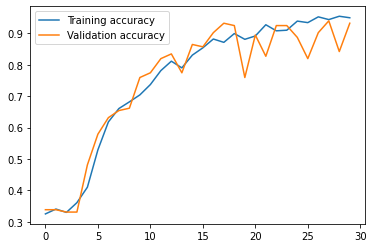

In [ ]:
#model train and test scores
model.evaluate(x_val,yval),model.evaluate(x_train,ytrain)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend();

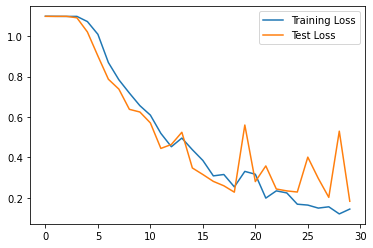

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test,ytest)
print('Final testing accuracy ', test_accuracy)

4/4 [==============================] - 1s 80ms/step - loss: 0.4309 - accuracy: 0.8594
Final testing accuracy  0.859375
